<a href="https://colab.research.google.com/github/momox369/Breast-Cancer-Classification-Model/blob/main/breast_cancer_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 0: Import Libraries and Upload the data file**

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# **Step 1: Visualization of the data distribution**



In [9]:
#Load the data file
from google.colab import files

# Upload files
uploaded = files.upload()
df = pd.read_csv('data.csv', low_memory=False)

Saving data.csv to data (1).csv


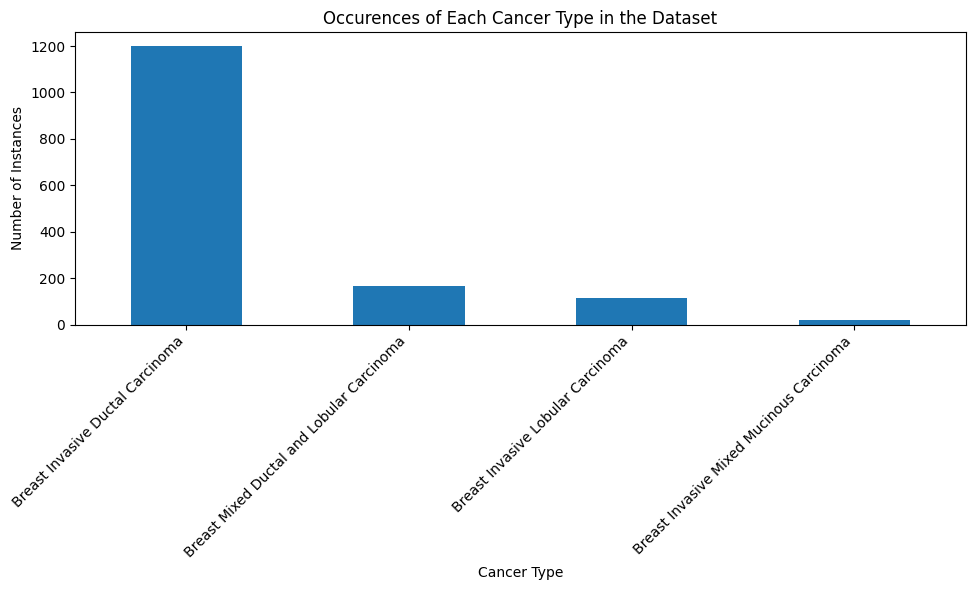

In [10]:
# Plot the histogram
cancer_counts = df['cancer_type'].value_counts()

plt.figure(figsize=(10, 6))
cancer_counts.plot(kind='bar')
plt.title('Occurences of Each Cancer Type in the Dataset')
plt.xlabel('Cancer Type')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()  # Adjust the layout to make room for the label
plt.show()

Analysis: Data Appears to be imbalenced, so the solution is that we are going to adopt Synthetic Minority Oversampling Technique (SMOTE) to increase the size of the minority classes with respect to the majority class which is Breast Invasive Ductal


#**Step 2: Data Cleaning and Processing**
This step includes removing duplicates instances, data transformation and mapping, and other inconsistency.
We will not remove missing instances as this will damage the data structure.



In [11]:
#Removing duplicates
df = df.drop_duplicates()
df = df.drop(columns=['patient_id'])

In [12]:
print("before\n", df['cancer_type'].value_counts())

#Removing duplicates
df = df.drop_duplicates()

before
 cancer_type
Breast Invasive Ductal Carcinoma             1199
Breast Mixed Ductal and Lobular Carcinoma     165
Breast Invasive Lobular Carcinoma             114
Breast Invasive Mixed Mucinous Carcinoma       18
Name: count, dtype: int64


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Convert set to list
categorical_columns = ["cancer_type", "cellularity", "pam50_+_claudin-low_subtype", "er_status_measured_by_ihc", "er_status", "her2_status_measured_by_snp6", "her2_status", "inferred_menopausal_state", "primary_tumor_laterality", "pr_status", "3-gene_classifier_subtype", "death_from_cancer", "pik3ca_mut", "tp53_mut", "muc16_mut",
                      "ahnak2_mut", "kmt2c_mut",    "syne1_mut",    "gata3_mut",    "map3k1_mut",    "ahnak_mut",    "dnah11_mut",    "cdh1_mut",    "dnah2_mut",    "kmt2d_mut",    "ush2a_mut",    "ryr2_mut",    "dnah5_mut",    "herc2_mut",    "pde4dip_mut",    "akap9_mut",    "tg_mut",    "birc6_mut",    "utrn_mut",    "tbx3_mut",    "col6a3_mut",    "arid1a_mut",    "lama2_mut",    "notch1_mut",
                      "cbfb_mut",    "ncor2_mut",    "col12a1_mut",    "col22a1_mut",    "pten_mut",    "akt1_mut",    "atr_mut",    "thada_mut",    "ncor1_mut",    "stab2_mut",    "myh9_mut",    "runx1_mut",    "nf1_mut",    "map2k4_mut",    "ros1_mut",    "lamb3_mut",    "arid1b_mut",    "erbb2_mut",    "sf3b1_mut",    "shank2_mut",    "ep300_mut",    "ptprd_mut",    "usp9x_mut",
                      "setd2_mut",    "setd1a_mut",    "thsd7a_mut",    "afdn_mut",    "erbb3_mut",    "rb1_mut",    "myo1a_mut",    "alk_mut",    "fanca_mut",    "adgra2_mut",    "ubr5_mut",    "pik3r1_mut",    "myo3a_mut",    "asxl2_mut",    "apc_mut",    "ctcf_mut",    "asxl1_mut",    "fancd2_mut",    "taf1_mut",    "kdm6a_mut",    "ctnna3_mut",    "brca1_mut",    "ptprm_mut",
                      "foxo3_mut",    "usp28_mut",    "gldc_mut",    "brca2_mut",    "cacna2d3_mut",    "arid2_mut",    "aff2_mut",    "lifr_mut",    "sbno1_mut",    "kdm3a_mut",    "ncoa3_mut",    "bap1_mut",    "l1cam_mut",    "pbrm1_mut",    "chd1_mut",    "jak1_mut",    "setdb1_mut",    "fam20c_mut",    "arid5b_mut",    "egfr_mut",    "map3k10_mut",    "smarcc2_mut",    "erbb4_mut",
                      "npnt_mut",    "nek1_mut",    "agmo_mut",    "zfp36l1_mut",    "smad4_mut",    "sik1_mut",    "casp8_mut",    "prkcq_mut",    "smarcc1_mut",    "palld_mut",    "dcaf4l2_mut",    "bcas3_mut",    "cdkn1b_mut",    "gps2_mut",    "men1_mut",    "stk11_mut",    "sik2_mut",    "ptpn22_mut",    "brip1_mut",    "flt3_mut",    "nrg3_mut",    "fbxw7_mut",    "ttyh1_mut",
                      "taf4b_mut",    "or6a2_mut",    "map3k13_mut",    "hdac9_mut",    "prkacg_mut",    "rpgr_mut",    "large1_mut",    "foxp1_mut",    "clk3_mut",    "prkcz_mut",    "lipi_mut",    "ppp2r2a_mut",    "prkce_mut",    "gh1_mut",    "gpr32_mut",    "kras_mut",    "nf2_mut",    "chek2_mut",    "ldlrap1_mut",    "clrn2_mut",    "acvrl1_mut",    "agtr2_mut",    "cdkn2a_mut",
                      "ctnna1_mut",    "magea8_mut",    "prr16_mut",    "dtwd2_mut",    "akt2_mut",    "braf_mut",    "foxo1_mut",    "nt5e_mut",    "ccnd3_mut",    "nr3c1_mut",    "prkg1_mut",    "tbl1xr1_mut",    "frmd3_mut",    "smad2_mut",    "sgcd_mut",    "spaca1_mut",    "rasgef1b_mut",    "hist1h2bc_mut",    "nr2f1_mut",    "klrg1_mut",    "mbl2_mut",    "mtap_mut",    "ppp2cb_mut",
                      "smarcd1_mut",    "nras_mut",    "ndfip1_mut",    "hras_mut",    "prps2_mut",    "smarcb1_mut", "stmn2_mut",    "siah1_mut"]


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])



In [17]:
#Separating the data
features = df.drop(columns=['cancer_type'])
labels = df['cancer_type']
print(df)

      cancer_type  age_at_diagnosis  cellularity  chemotherapy  \
0               0             54.29            0             1   
1               0             43.45            2             0   
2               0             74.11            0             0   
3               0             51.87            0             0   
4               0             87.18            2             0   
...           ...               ...          ...           ...   
1491            0             50.08            2             0   
1492            0             60.99            0             0   
1493            0             83.39            2             0   
1494            0             60.63            0             0   
1495            0             68.74            1             1   

      pam50_+_claudin-low_subtype  cohort  er_status_measured_by_ihc  \
0                               3       1                          1   
1                               2       4                      

# **Step 3: Re-sampling the data using SMOTE**

In [ ]:
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from imblearn.over_sampling import SMOTE

new_features, new_labels = SMOTE(random_state=42).fit_resample(features, labels)

In [ ]:
#ploting the new re-sampled data
# Plot the histogram
cancer_counts = new_labels.value_counts()

plt.figure(figsize=(10, 6))
cancer_counts.plot(kind='bar')
plt.title('Occurences of Each Cancer Type in the Dataset')
plt.xlabel('Cancer Type')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()  # Adjust the layout to make room for the label
plt.show()